## ISIC2019 dataset

#### PCA

In [ ]:
import pandas as pd

groundtruth = pd.read_csv("../content/isic-2019/ISIC_2019_Training_GroundTruth.csv")
groundtruth = groundtruth.set_index("image")
indist = list(groundtruth.index)

In [ ]:
import os
from pathlib import Path
import numpy as np
from PIL import Image

X_data = []
#ood_data_darker = []
#ood_data_lighter = []
#ood_data = []

folder_dir = "../isic-2019/"
images = Path(folder_dir).glob("*.jpg")
count = 0
for i in list(images)[:10000]:
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    if i.stem in indist:
        X_data.append(img_resize)
        count += 1
    # elif i.stem in oodist:
    #    ood_data.append(img_resize)

count the number of images in ISIC 2019

In [ ]:
images = Path(folder_dir).glob("*.jpg")
num_images = len(list(images))
print("Number of images:", num_images)

Number of images: 25331


### Fitzpatrick 17k dataset

count the number of images for dark and light skin tones





In [ ]:
darker_dir = "../dataset/Darker_Skin_Tones"
lighter_dir = "..dataset/Lighter_Skin_Tones"

# Process images from the darker directory
darker_images = Path(darker_dir).glob("*.jpg")
lighter_images = Path(lighter_dir).glob("*.jpg")

num_D_images = len(list(darker_images))
print("Number of darker images:", num_D_images)

num_L_images = len(list(lighter_images))
print("Number of lighter images:", num_L_images)

Number of darker images: 1318
Number of lighter images: 10904


In [ ]:
ood_darker = []
ood_lighter = []
ood_data = []
# Define the directories for both darker and lighter images
darker_dir = "..dataset/Darker_Skin_Tones"
lighter_dir = "..dataset/Lighter_Skin_Tones"

# Process images from the darker directory
darker_images = Path(darker_dir).glob("*.jpg")
for i in darker_images:
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    ood_darker.append(img_resize)
    ood_data.append(img_resize)

# Process images from the lighter directory
lighter_images = Path(lighter_dir).glob("*.jpg")
for i in list(lighter_images)[:3300]:
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    ood_lighter.append(img_resize)
    ood_data.append(img_resize)

In [ ]:
ood_data = np.array(ood_data)
ood_lighter= np.array(ood_lighter)
ood_darker = np.array(ood_darker)

In [ ]:
len(X_data) , len(ood_data),len(ood_lighter) , len(ood_darker)

(10000, 4618, 3300, 1318)

In [ ]:
import numpy as np

X_array = np.array(X_data)
ood_array = np.array(ood_data)  #for all
ood_D_array = np.array(ood_darker) #for darker only
ood_L_array = np.array(ood_lighter) #for lighter only


#### for 2 classes

In [ ]:
y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
#y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
#y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_L_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(13300, 3072) (13300,)


In [ ]:
y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
#y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
#y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_D_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(11318, 3072) (11318,)


In [ ]:
y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
#y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
#y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(14618, 3072) (14618,)


#### For mutiple classes

In [ ]:
y_ind = np.zeros(X_array.shape[0])  # not an OOD sample
y_ood= np.ones(ood_array.shape[0]) *1 # an OOD sample
y_ood_D = np.ones(ood_D_array.shape[0]) * 2  # an OOD sample (darker)
y_ood_L = np.ones(ood_L_array.shape[0]) * 3  # an OOD sample (lighter)
X = np.concatenate([X_array, ood_D_array, ood_L_array])
y = np.concatenate([y_ind, y_ood_D, y_ood_L])
print(X.shape, y.shape)

(14618, 3072) (14618,)


### PCA visualization

for multiple classes

explained variance ratio (first two components): [0.44755631 0.12470864]


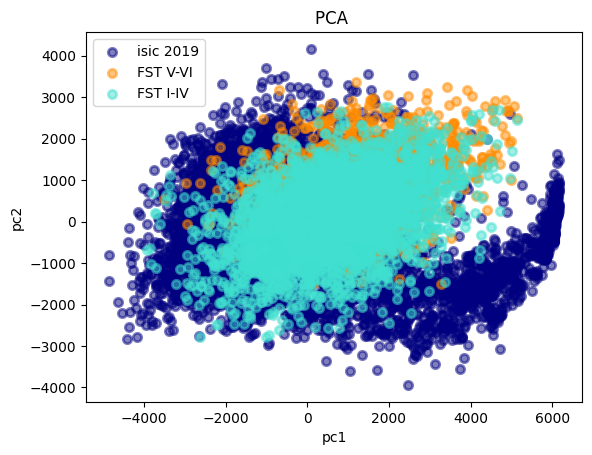

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import aux
import importlib

importlib.reload(aux)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

aux.plot_pca(X_pca, y)

plt.show()

2 classes only

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import auxx
import importlib

importlib.reload(auxx)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)



explained variance ratio (first two components): [0.46313625 0.12118103]


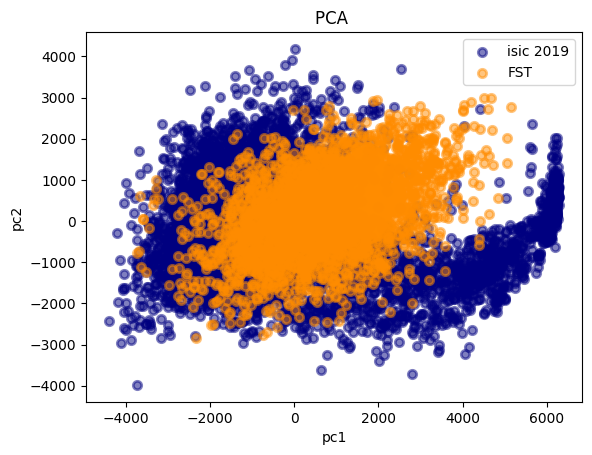

In [ ]:
auxx.plot_pca(X_pca, y)

plt.show()

# Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, stratify=y, random_state=42)
clf = IsolationForest(max_samples=200, random_state=0)
clf.fit(X_train)



### Isolation Forest Parameter tuning with gridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, stratify=y, random_state=42)
clf = IsolationForest(random_state=0)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300], #,list(range(100, 800, 5))
    'max_samples': list(range(100, 200, 5)),
    'contamination': [0.1, 0.2,0.3],
    #'max_features': [2, 5, 10],
    'bootstrap': [True, False]
}

f1sc = make_scorer(f1_score, average='micro')

grid_estimator = GridSearchCV(clf, param_grid, scoring=f1sc, refit=True, cv=5, return_train_score=True,n_jobs=-1)
grid_estimator.fit(X_train, y_train)


# Print the best parameters and best F1 score
best_params = grid_estimator.best_params_
best_f1_score = grid_estimator.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score:", best_f1_score)

# Save the best parameters and best F1 score to a text file
with open('grid_search_results.txt', 'w') as file:
    file.write(f"Best Parameters: {best_params}\n")
    file.write(f"Best F1 Score: {best_f1_score}\n")

## Model building after getting the best parameter from the grid search :

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.4, stratify=y, random_state=42)
best_clf = IsolationForest(n_estimators=300, contamination=0.1, bootstrap=False, random_state=0)
best_clf.fit(X_train)
y_pred = best_clf.predict(X_test)

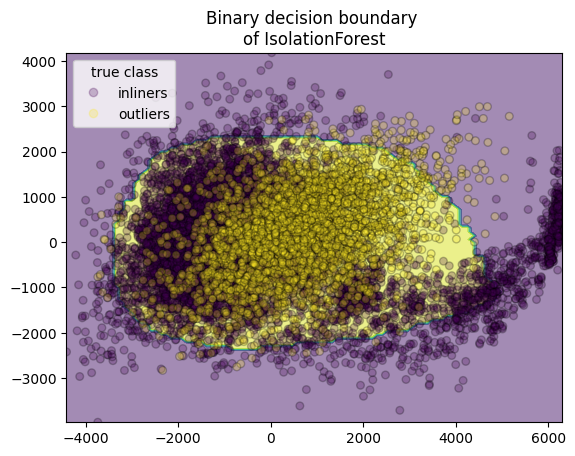

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    best_clf,
    X_pca,
    response_method="predict",
    alpha=0.5,
)

sc = disp.ax_.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, alpha=0.25, edgecolor="k")
handles, labels = sc.legend_elements()
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["inliners", "outliers"], title="true class")
plt.show()

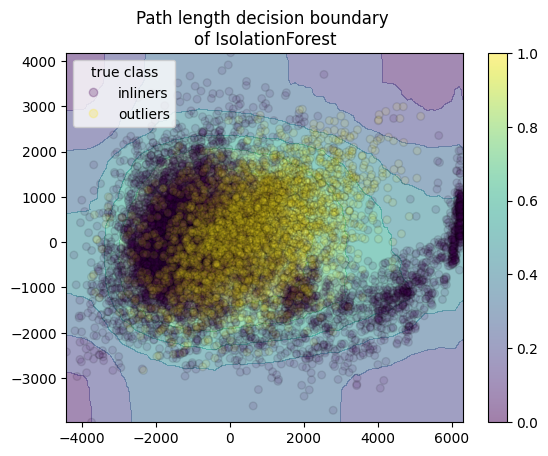

In [ ]:
disp = DecisionBoundaryDisplay.from_estimator(
    best_clf,
    X_pca,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, alpha=0.1, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["inliners", "outliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()